# RNN: Implementation From Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Utils import *
from RNN import *

## Data Preprocessing

## Model Architecture

Preparing word data (one-hot inputs)...
Total words found: 140
Vocabulary size (threshold>=1): 85
Using entire text as one sequence.
Prepared 1 training sequence(s).
Starting training (One-Hot Input) for 500 epochs...
Learning rate: 0.001, Clipping: 5
Epoch 50/500, Loss: 2.9225, Time: 0.03s

Generated examples:
  recurrent structure or speech such type cannot numerical can recognize is
  recurrent this a genomes as artificial graph use and is handwriting
  recurrent is connected or are that data unlike generically are temporal

Epoch 100/500, Loss: 1.0890, Time: 0.02s

Generated examples:
  recurrent classes as a series are with state term used neural
  recurrent tasks dynamic recognition process internal structure inputs use the type
  recurrent generically numerical feedforward the generically impulse a network finite unrolled

Epoch 150/500, Loss: 0.4300, Time: 0.02s

Generated examples:
  recurrent internal exhibit broad rnns neural infinite recurrent network is use
  recurrent net

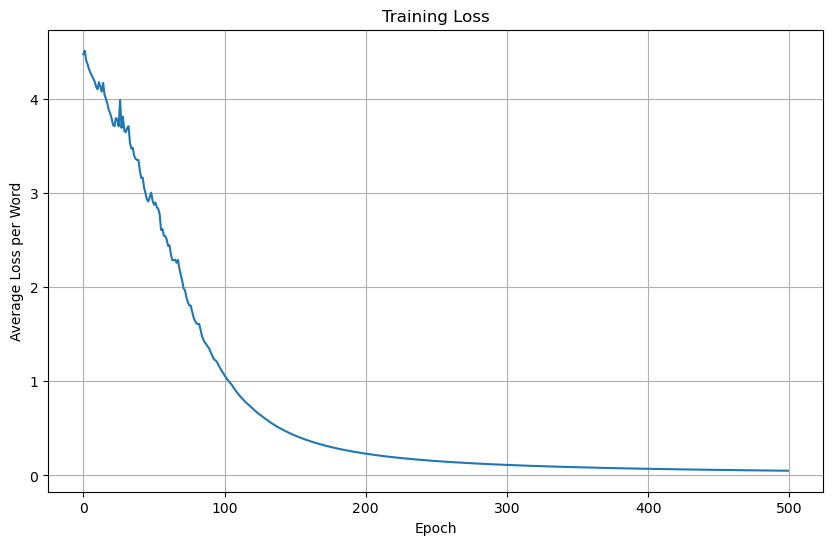


--- Sampling from the trained model ---

Sampling (random choice) starting with 'neural':
neural networks rnns applicable to refer their of data recurrent to

Sampling (argmax choice) starting with 'neural':
neural networks rnns rnns to a sequences of neural classes to


In [2]:
def main():
    # 1. Prepare Data
    corpus_text = """
    Recurrent Neural Networks, or RNNs, are a type of artificial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, or numerical times series data.
    Unlike feedforward neural networks, RNNs use their internal state (memory) to process sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition.
    The term Recurrent Neural Network is used generically to refer to two broad classes of networks with a similar general structure, where one is finite impulse and the other is infinite impulse. Both classes of networks exhibit temporal dynamic behavior. A finite impulse recurrent network is a directed acyclic graph that can be unrolled and replaced with a strictly feedforward neural network, while an infinite impulse recurrent network is a directed cyclic graph that cannot be unrolled.
    """
    
    # Prepare word-level data
    X_one_hot_data, Y_data, word_to_ix, ix_to_word, vocab_size = prepare_word_data_onehot(
        corpus_text,
        vocab_threshold=1
    )
    if not X_one_hot_data: sys.exit("Data preparation failed.")
    
    # 2. Define Model Hyperparameters
    hidden_dim = 100
    learning_rate = 0.001
    epochs = 500
    clip_value = 5
    print_every = 50
    
    # 3. Instantiate Model
    rnn_model = RNN(hidden_dim=hidden_dim, vocab_size=vocab_size)
    
    # Set word mappings
    rnn_model.word_to_ix = word_to_ix
    rnn_model.ix_to_word = ix_to_word
    
    # 4. Train Model (No data_generator needed anymore)
    loss_history = rnn_model.train(
        X_one_hot_data, 
        Y_data,
        lr=learning_rate,
        epochs=epochs,
        clip_value=clip_value,
        print_every=print_every,
        generated_examples=3  # Show 3 examples per reporting interval
    )
    
    # 5. Plot Loss (Unchanged)
    if loss_history:
        plt.figure(figsize=(10, 6))
        plt.plot(loss_history)
        plt.xlabel("Epoch")
        plt.ylabel("Average Loss per Word")
        plt.title("Training Loss")
        plt.grid(True)
        plt.show()
    
    # 6. Evaluate by Sampling (Using the word-specific predict method)
    print("\n--- Sampling from the trained model ---")
    seed_word = "neural"
    sample_length = 10
    
    print(f"\nSampling (random choice) starting with '{seed_word}':")
    sampled_text_random = rnn_model.predict_words(seed_word, n=sample_length, sample_strategy='random')
    print(f"{sampled_text_random}")
    
    print(f"\nSampling (argmax choice) starting with '{seed_word}':")
    sampled_text_argmax = rnn_model.predict_words(seed_word, n=sample_length, sample_strategy='argmax')
    print(f"{sampled_text_argmax}")

if __name__ == "__main__":
    main()